[Reference](https://medium.com/@snehabajaj108/ten-must-know-seaborn-plots-1f3a82dc99c5)

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

#Import Datasets
exercise = sns.load_dataset('exercise')
iris = sns.load_dataset('iris')
penguins = sns.load_dataset('penguins')
mpg = sns.load_dataset('mpg')
titanic = sns.load_dataset('titanic')
tips = sns.load_dataset('tips')

# 1. Bar Plots

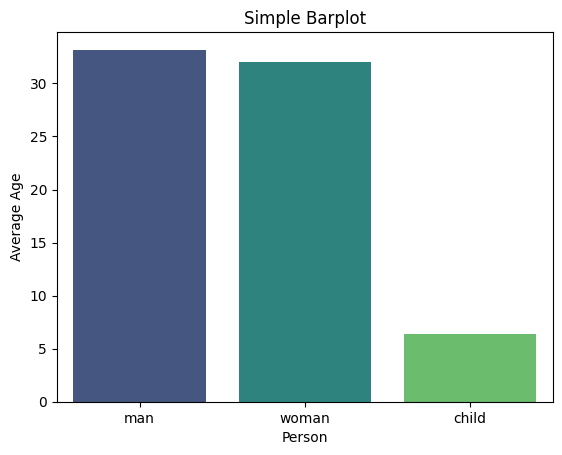

In [2]:
# Simple barplot
sns.barplot(data=titanic, x="who", y="age", estimator='mean',
            errorbar=None, palette='viridis')
plt.title('Simple Barplot')
plt.xlabel('Person')
plt.ylabel('Average Age')
plt.show();

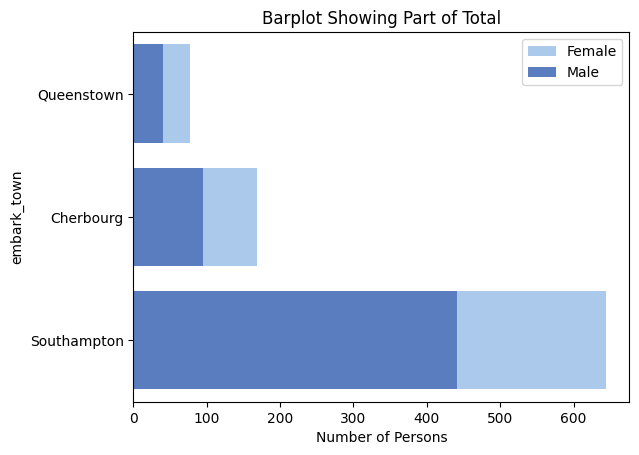

In [3]:
#Prepare data for next plot
data = titanic.groupby('embark_town').agg({'who':'count','sex': lambda x: (x=='male').sum()}).reset_index()
data.rename(columns={'who':'total', 'sex':'male'}, inplace=True)
data.sort_values('total', inplace=True)

# Barplot Showing Part of Total
sns.set_color_codes("pastel")
sns.barplot(x="total", y="embark_town", data=data,
            label="Female", color="b")
sns.set_color_codes("muted")
sns.barplot(x="male", y="embark_town", data=data,
            label="Male", color="b")
plt.title('Barplot Showing Part of Total')
plt.xlabel('Number of Persons')
plt.legend(loc='upper right')
plt.show()

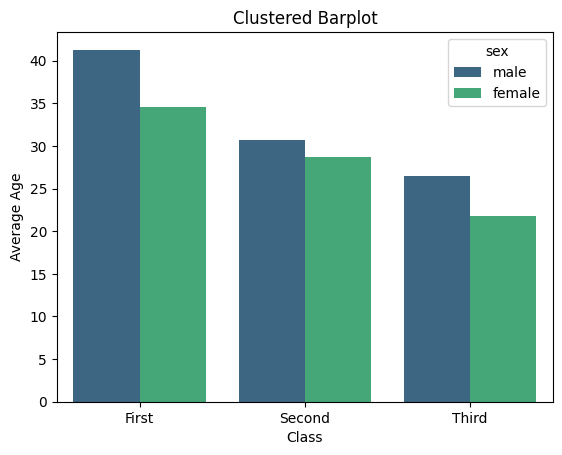

In [4]:
# Clustered barplot
sns.barplot(data=titanic, x='class', y='age', hue='sex',
            estimator='mean', errorbar=None, palette='viridis')
plt.title('Clustered Barplot')
plt.xlabel('Class')
plt.ylabel('Average Age')
plt.show();

# 2. Count Plots

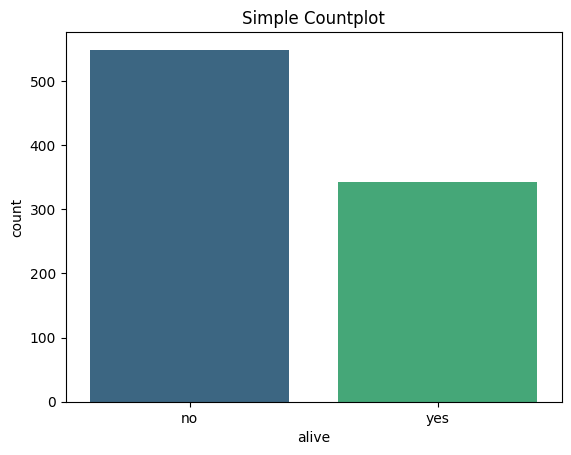

In [5]:
# Simple Countplot
sns.countplot(data=titanic, x='alive', palette='viridis')
plt.title('Simple Countplot')
plt.show();

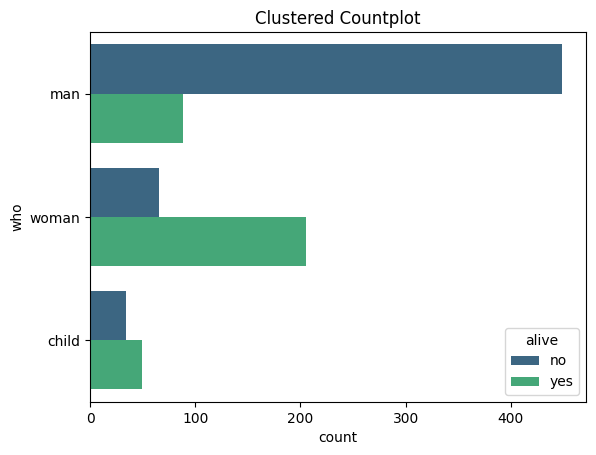

In [6]:
# Clustered Countplot
sns.countplot(data=titanic, y="who",
            hue="alive", palette='viridis')
plt.title('Clustered Countplot')
plt.show();

# 3. Histograms

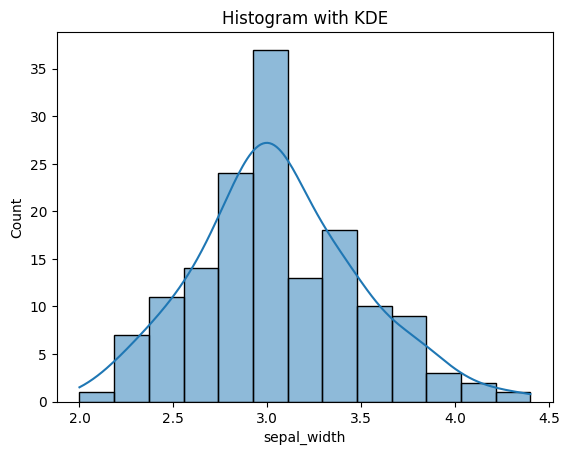

In [7]:
# Histogram with KDE
sns.histplot(data=iris, x='sepal_width', kde=True)
plt.title('Histogram with KDE')
plt.show();

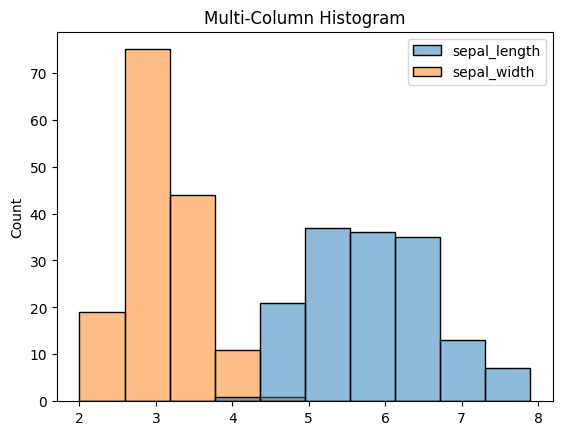

In [8]:
# Histogram with multiple features
sns.histplot(data=iris[['sepal_length','sepal_width']])
plt.title('Multi-Column Histogram')
plt.show();

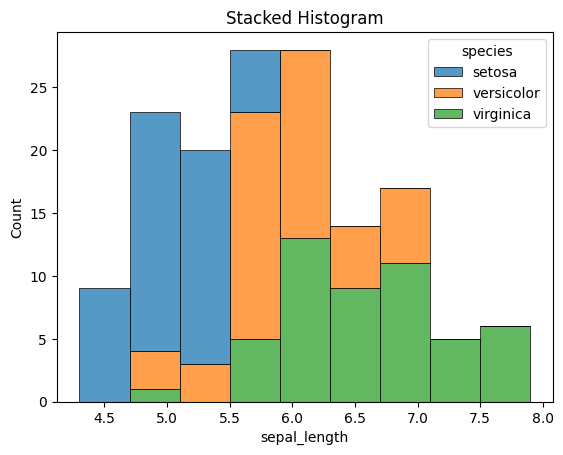

In [9]:
#Stacked Histogram
sns.histplot(iris, x='sepal_length', hue='species', multiple='stack',
             linewidth=0.5)
plt.title('Stacked Histogram')
plt.show()

# 4. Cat Plots (Box, Violin, Swarm, Boxen)

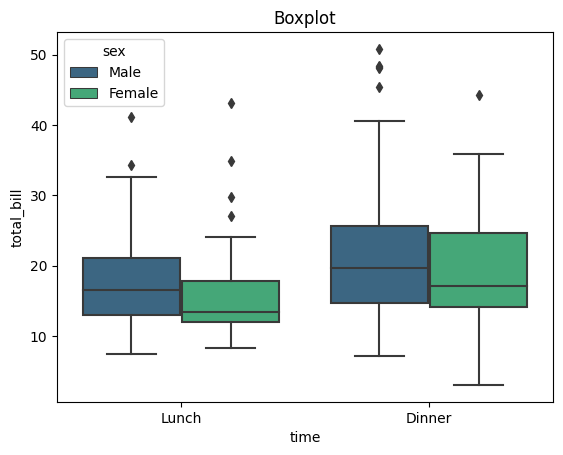

In [10]:
# Boxplot
sns.boxplot(data=tips, x='time', y='total_bill', hue='sex', palette='viridis')
plt.title('Boxplot')
plt.show()

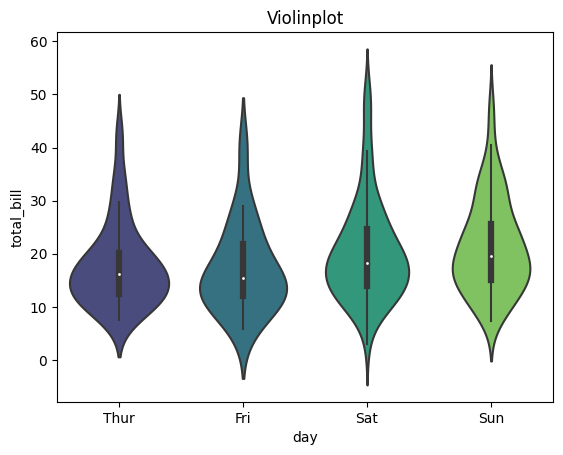

In [11]:
# Violinplot
sns.violinplot(data=tips, x='day', y='total_bill', palette='viridis')
plt.title('Violinplot')
plt.show()

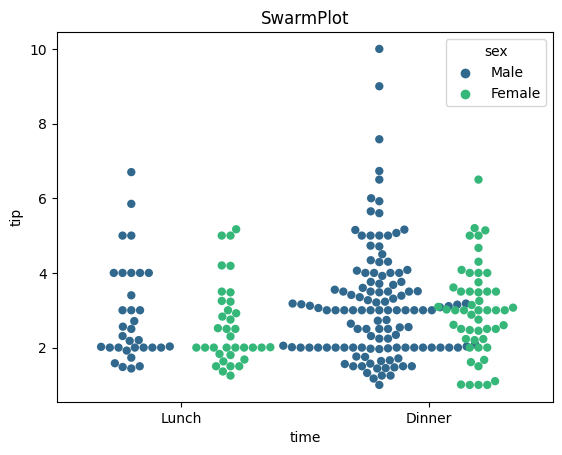

In [12]:
#Swarmplot
sns.swarmplot(data=tips, x='time', y='tip', dodge=True, palette='viridis', hue='sex', s=6)
plt.title('SwarmPlot')
plt.show()

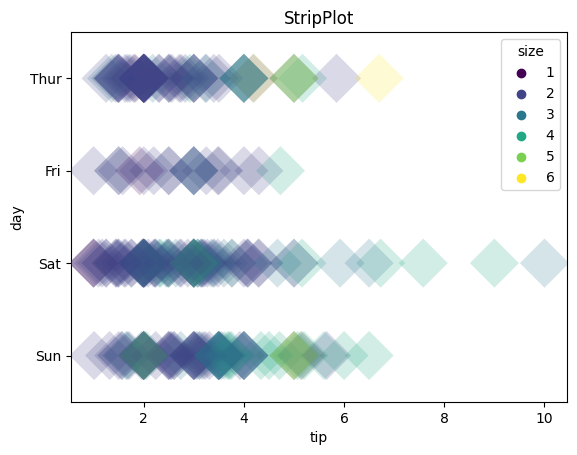

In [13]:
#StripPlot
sns.stripplot(data=tips, x='tip', hue='size', y='day', s=25, alpha=0.2,
             jitter=False, marker='D',palette='viridis')
plt.title('StripPlot')
plt.show()

# 5. Multiple Plots using FacetGrid

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


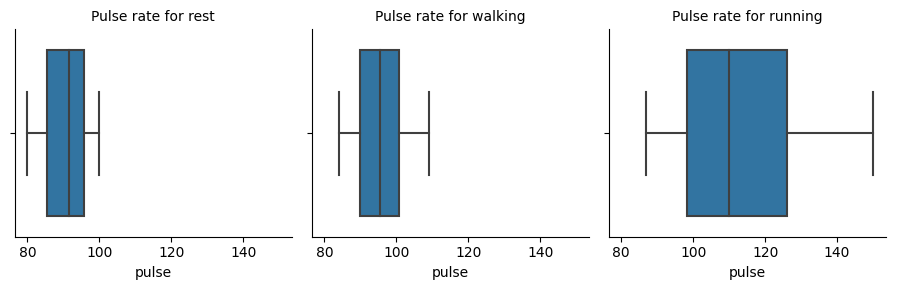

In [14]:
# Creating subplots using FacetGrid
g = sns.FacetGrid(exercise, col='kind', palette='Paired')

# Drawing a plot on every facet
g.map(sns.boxplot, 'pulse')
g.set_titles(col_template="Pulse rate for {col_name}")
g.add_legend();

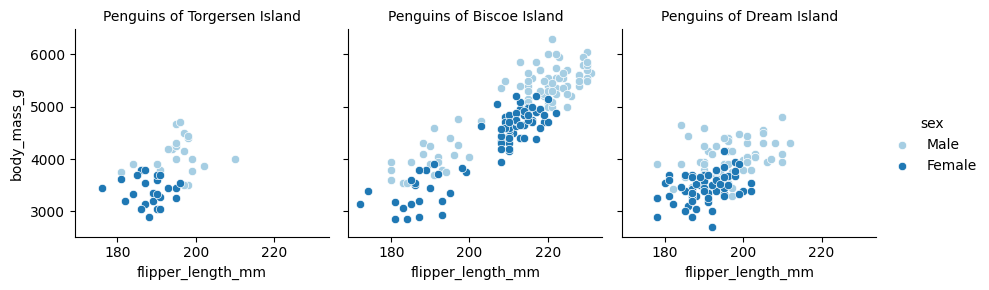

In [15]:
# Creating subplots using FacetGrid
g = sns.FacetGrid(penguins, col='island',hue='sex', palette='Paired')

# Drawing a plot on every facet
g.map(sns.scatterplot, 'flipper_length_mm', 'body_mass_g')
g.set_titles(template="Penguins of {col_name} Island")
g.add_legend();

# 6. Joint Plots

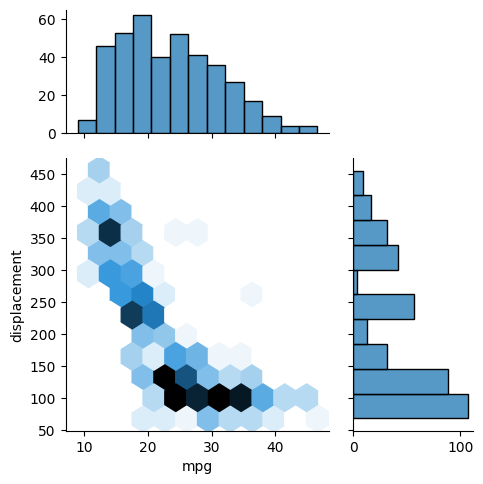

In [16]:
# Hex Plot with Histogram margins
sns.jointplot(x="mpg", y="displacement", data=mpg,
              height=5, kind='hex', ratio=2, marginal_ticks=True);

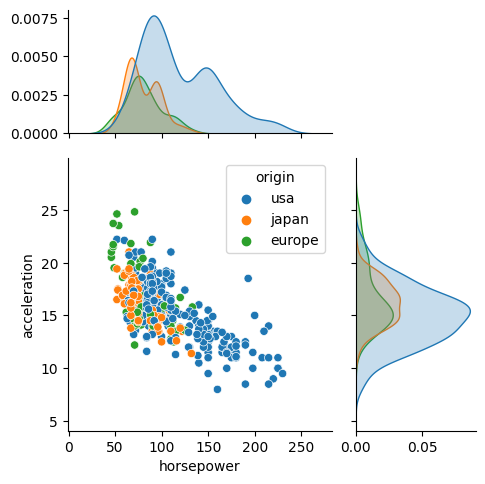

In [17]:
# Scatter Plot with KDE Margins
sns.jointplot(x="horsepower", y="acceleration", data=mpg,
             hue="origin", height=5, ratio=2, marginal_ticks=True);

# 7. KDE Plots

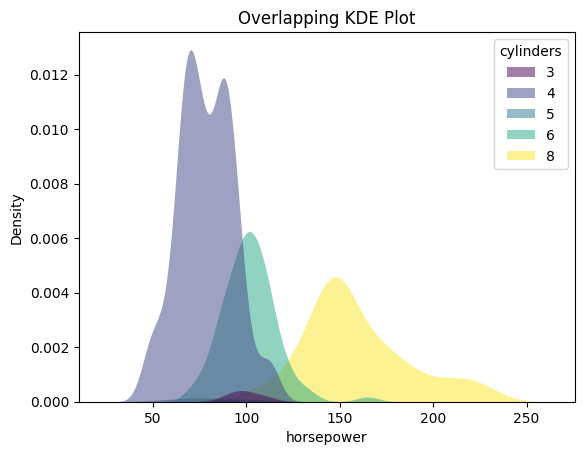

In [18]:
#Overlapping KDE Plots
sns.kdeplot(data=mpg, x='horsepower', hue='cylinders', fill=True,
           palette='viridis', alpha=.5, linewidth=0)
plt.title('Overlapping KDE Plot')
plt.show();

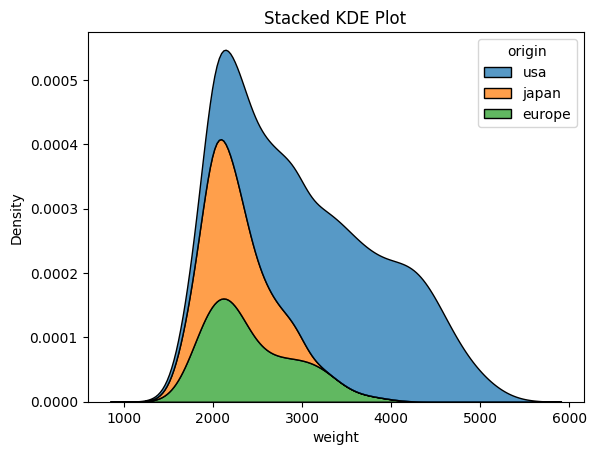

In [19]:
#Stacked KDE Plots
sns.kdeplot(data=mpg, x="weight", hue="origin", multiple="stack")
plt.title('Stacked KDE Plot')
plt.show();

# 8. Pairplots

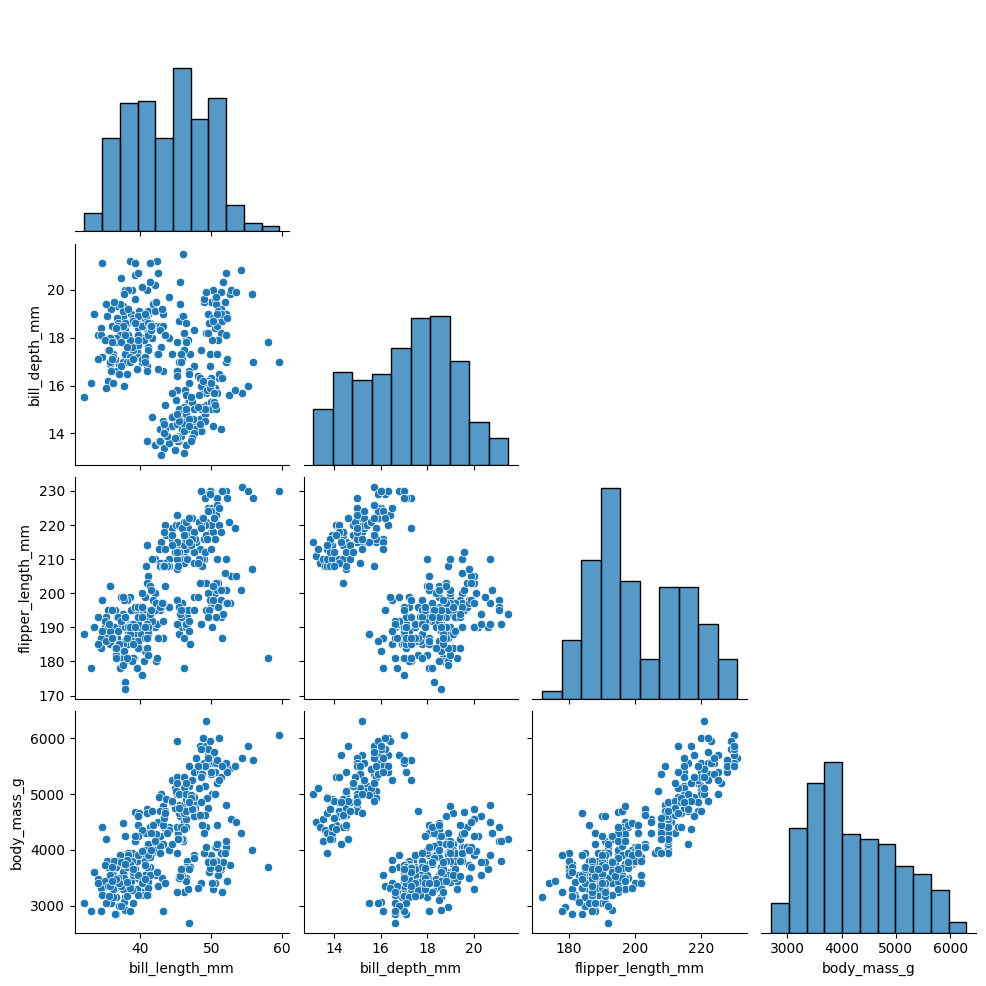

In [20]:
#Simple Pairplot
sns.pairplot(data=penguins, corner=True);

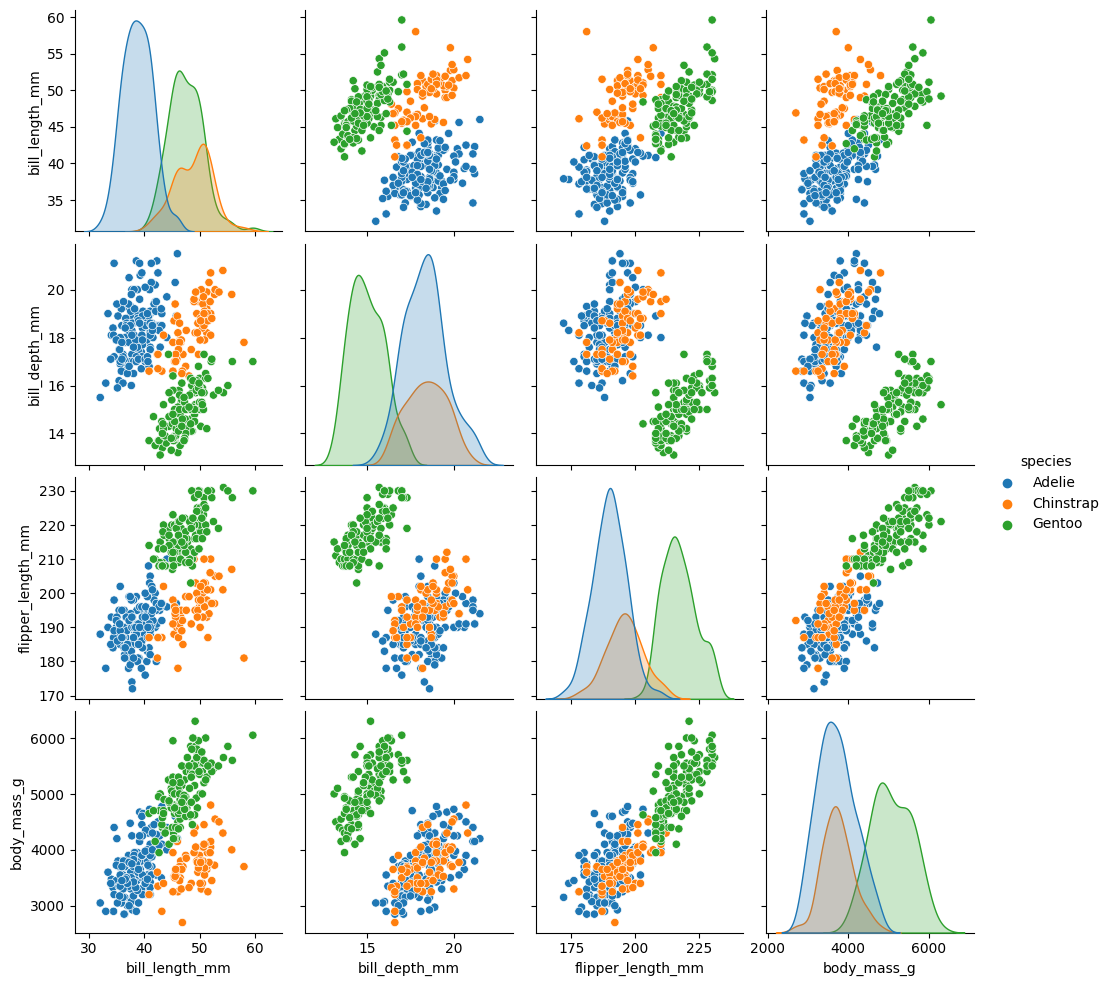

In [21]:
# Pairplot with hues
sns.pairplot(data=penguins, hue='species');

# 9. Heatmaps

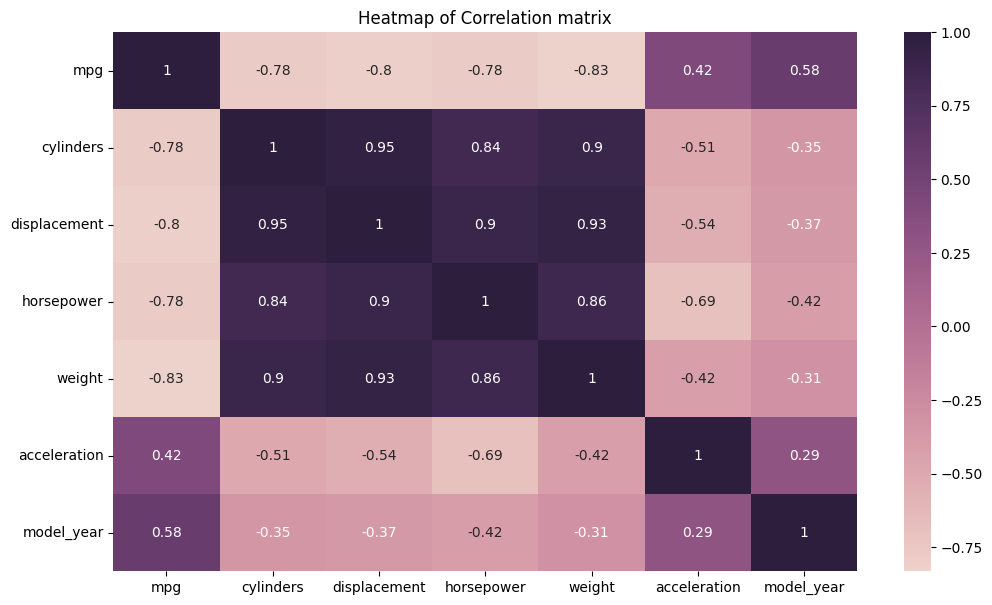

In [22]:
#Selection of numeric columns from the dataset
num_cols = list(mpg.select_dtypes(include='number'))
fig = plt.figure(figsize=(12,7))

#Correlation Heatmap
sns.heatmap(data=mpg[num_cols].corr(),
            annot=True, cmap=sns.cubehelix_palette(as_cmap=True))
plt.title('Heatmap of Correlation matrix')
plt.show()

# 10. Scatter Plots

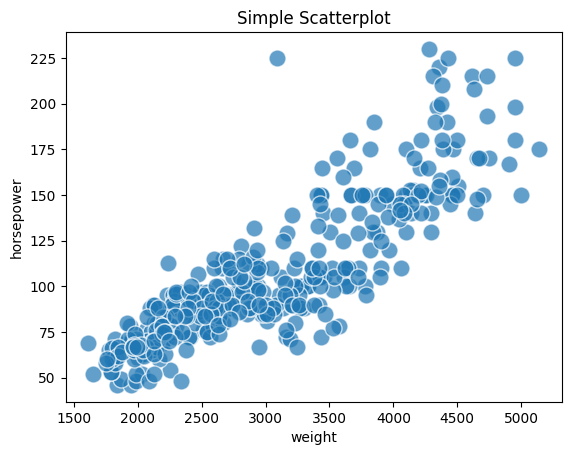

In [23]:
# Simple Scatterplot
sns.scatterplot(data=mpg, x='weight', y='horsepower', s=150, alpha=0.7)
plt.title('Simple Scatterplot')
plt.show();

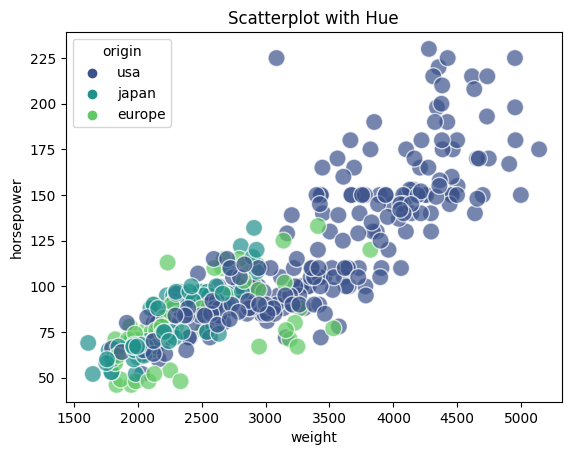

In [24]:
# Scatterplot with Hue
sns.scatterplot(data=mpg, x='weight', y='horsepower', s=150, alpha=0.7,
               hue='origin', palette='viridis')
plt.title('Scatterplot with Hue')
plt.show()

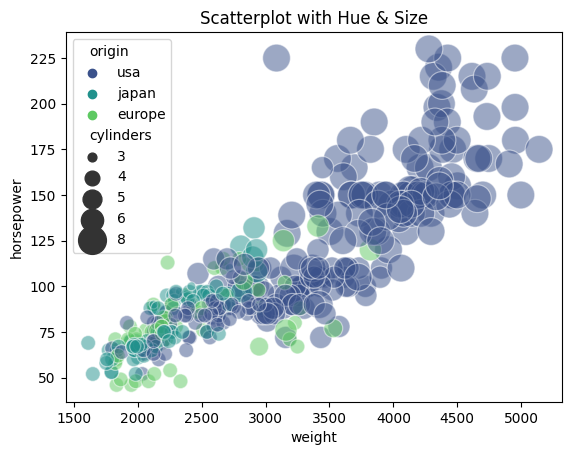

In [25]:
# Scatterplot with Hue & Size
sns.scatterplot(data=mpg, x='weight', y='horsepower', sizes=(40, 400), alpha=.5,
              palette='viridis', hue='origin', size='cylinders')
plt.title('Scatterplot with Hue & Size')
plt.show()